In [22]:
import tonic
from tonic import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

We calculate the time between two frames from looking at the raw data

In [23]:
dataset = datasets.DAVISDATA(save_to="data", recording="shapes_6dof")

data, targets = dataset[0]
events, imu, images = data
frame_time = images['ts'][1] - images['ts'][0]

In [24]:
images['frames'].shape

(1356, 180, 240)

Next we specify the time surface transform that is going to be applied to events only whenever a new sample is loaded

In [31]:
# You will need at least Tonic 1.3.2 for this to work!
tau = frame_time/10
sufarce_transform1 = transforms.ToTimesurface(sensor_size=dataset.sensor_size, tau=tau, dt=frame_time)
sufarce_transform2 = transforms.ToTimesurface(sensor_size=dataset.sensor_size, tau=10*tau, dt=frame_time)
sufarce_transform3 = transforms.ToTimesurface(sensor_size=dataset.sensor_size, tau=100*tau, dt=frame_time)

def data_transform(data):
    events, imu, images = data
    surfaces1 = sufarce_transform1(events)
    surfaces2 = sufarce_transform2(events)
    surfaces3 = sufarce_transform3(events)
    return surfaces1, surfaces2, surfaces3, imu, images

Let's redefine the dataset with the data transform

In [32]:
dataset = datasets.DAVISDATA(save_to="data", recording="shapes_6dof", transform=data_transform)

Loading the whole recording!

In [33]:
surfs1, surfs2, surfs3, imu, images = dataset[0][0]

In [37]:
merged_surf1 = surfs1[:,0] - surfs1[:,1]
merged_surf2 = surfs2[:,0] - surfs2[:,1]
merged_surf3 = surfs3[:,0] - surfs3[:,1]

merged_surf = np.stack((merged_surf1, merged_surf2, merged_surf3), axis=1)
merged_surf_np = np.moveaxis(merged_surf, 1,3)
print(merged_surf.shape)

(1355, 3, 180, 240)


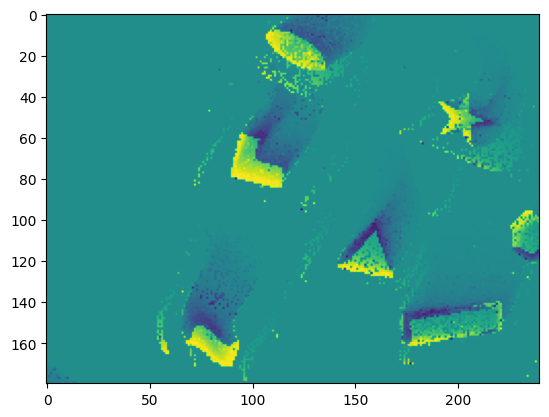

In [41]:
plt.imshow(merged_surf2[400])

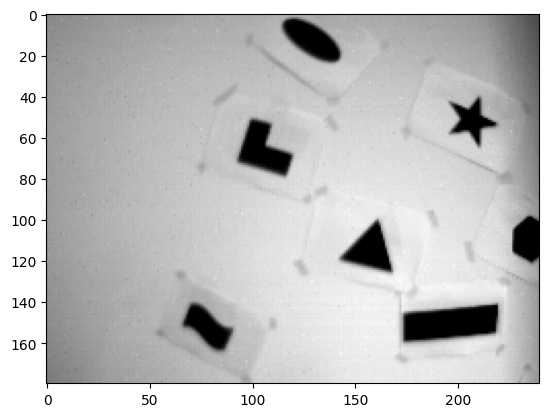

In [42]:
plt.imshow(images['frames'][400, :, :], cmap='gray')

Let's plot the multichannel timesurface

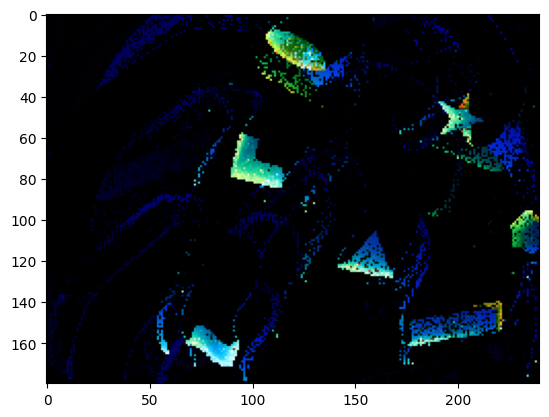

In [43]:
plt.imshow(merged_surf_np[400])